<h2>Objectives</h2>

- How education may influence the salary?
- Gender Ratio of developers across the globe
- The rate of increase in salary with the years of experience
- More Language = More Money?

In [1]:
# Importing Libraries
import pandas as pd

In [2]:
# Importing Dataset 
df = pd.read_csv('survey_results_public.csv')

# Creating copies of original dataset
question_1 = df.copy(deep=True)
question_2 = df.copy(deep=True)
question_3 = df.copy(deep=True)
question_4 = df.copy(deep=True)
question_5 = df.copy(deep=True)
df.shape

(51392, 154)

<h2>How education may influence the salary?</h2>

In [3]:
result_1 = question_1.groupby(['FormalEducation']).mean().reset_index()
result_1[['FormalEducation', 'Salary']]

,FormalEducation,Salary
0,Bachelor's degree,56914.358553
1,Doctoral degree,78527.933053
2,I never completed any formal education,44430.660621
3,I prefer not to answer,38284.836141
4,Master's degree,58250.838766
5,Primary/elementary school,62677.337356
6,Professional degree,39503.658863
7,Secondary school,40395.148419
8,Some college/university study without earning ...,55912.810459


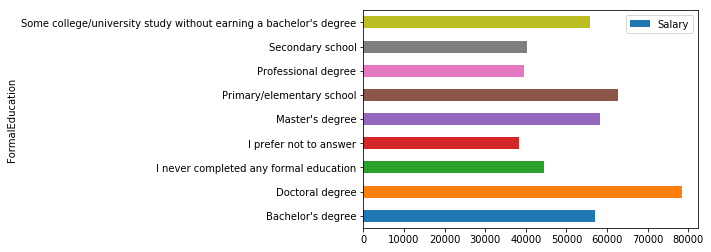

In [14]:
# Visualisation for objective 1
ax1 = result_1.plot.barh(x='FormalEducation', y='Salary')

<h2>Gender Ratio of developers across the globe</h2>

In [5]:
# Considering only male and female
searchfor = ['Gender non-conforming', 'Transgender; Gender non-conforming','Gender non-conforming; Other', 'Transgender; Other', 'Transgender', 'Other', 'Male; Female']
question_2.dropna(subset=['Gender'], inplace=True)
question_2 = question_2[~question_2.Gender.str.contains('|'.join(searchfor))]
question_2.reset_index(drop=True, inplace=True)
question_2.drop(['Respondent'], axis=1)
question_2[['Country', 'Gender']]

# Counting the number of male and female in each country
pivoted_data = question_2.pivot_table(index='Country', columns='Gender', aggfunc='size', fill_value=0)

result_2 = pd.DataFrame({'Male': pivoted_data['Male'], 'Female': pivoted_data['Female']}, index=pivoted_data.index)
result_2.head(10)

,Male,Female
Country,,
Afghanistan,9,1
Aland Islands,2,0
Albania,28,3
Algeria,15,1
Andorra,3,0
Angola,1,0
Antarctica,5,1
Antigua and Barbuda,3,0
Argentina,151,8


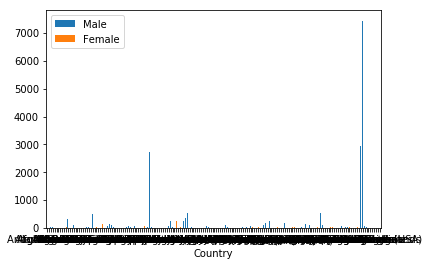

In [6]:
# Visualisation for objective 2
ax2 = result_2.plot.bar(rot=0)

<h2>Rate of increase of salary with years of experience</h2>

In [7]:
result_3 = question_3.groupby(['YearsProgram']).mean().reset_index()
result_3[['YearsProgram', 'Salary']]

,YearsProgram,Salary
0,1 to 2 years,33952.955892
1,10 to 11 years,48056.752718
2,11 to 12 years,54866.916054
3,12 to 13 years,55753.347727
4,13 to 14 years,57149.324680
5,14 to 15 years,63487.522662
6,15 to 16 years,62791.031631
7,16 to 17 years,63898.935647
8,17 to 18 years,73085.731295
9,18 to 19 years,71599.061950


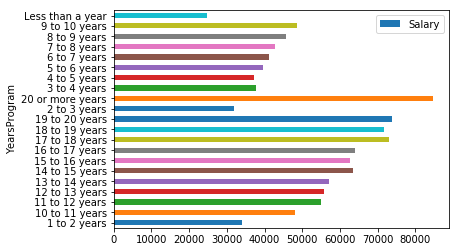

In [8]:
# Visualisation for objective 3
ax3 = result_3.plot.barh(x='YearsProgram', y='Salary')

<h2> More Language = More Money? </h2>

In [9]:
# Counting number of languages
question_4['LanguageCount'] = question_4['HaveWorkedLanguage'].str.count(';') + 1

# Dropping NaN in LanguageCount
question_4.dropna(subset=['LanguageCount'], inplace=True)
question_4.reset_index(drop=True, inplace=True)
print('Responses:', question_4['Salary'].shape[0])

# Grouping Salary according to number of languages
grouped_salary = question_4.groupby(['LanguageCount']).mean().reset_index()

# Dropping NaN in Salary
grouped_salary.dropna(subset=['Salary'], inplace=True)
grouped_salary.reset_index(drop=True, inplace=True)

Responses: 36625


In [10]:
# Fitlering outliers
salary_quantile = grouped_salary["Salary"].quantile(0.1)

grouped_salary = grouped_salary[grouped_salary["Salary"] > salary_quantile].head(10)
grouped_salary[['LanguageCount', 'Salary']]

,LanguageCount,Salary
0,1.0,53202.325036
1,2.0,57888.283987
2,3.0,55213.482484
3,4.0,58317.869749
4,5.0,59163.122613
5,6.0,58405.710495
6,7.0,58763.422530
7,8.0,57447.874539
8,9.0,53301.021354
9,10.0,58741.498670


<h4>Average Salary</h4>

In [11]:
print('Average Salary: ', grouped_salary['Salary'].mean())

Average Salary:  57044.46114557163


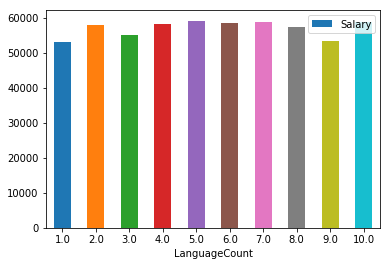

In [12]:
# Visualisation for objective 4
ax4 = grouped_salary.plot.bar(x='LanguageCount', y='Salary', rot=0)